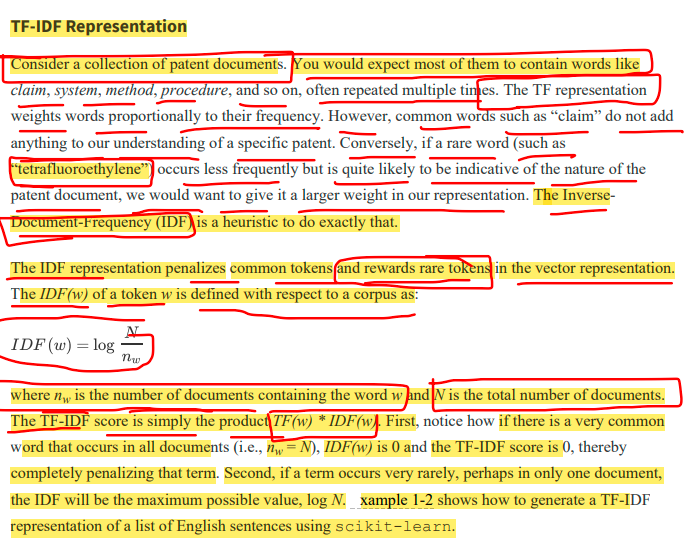

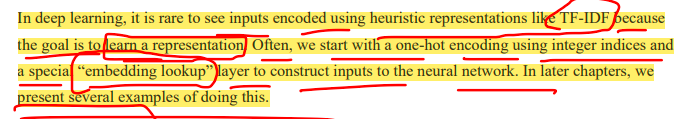

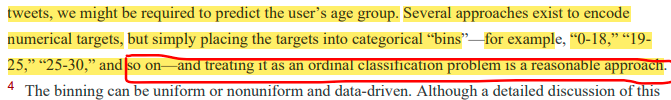

# Basic Tensor OP

In [13]:
import torch

print(torch.rand(2, 3)) # uniform random [0,1)
print(torch.randn(2, 3)) 
# random normal mean 0 and variance 1  , The values can span the entire range of real numbers,
#  but most will fall within [−3,3], as per the properties of the normal distribution.


tensor([[0.7469, 0.1923, 0.8599],
        [0.9224, 0.8369, 0.8887]])
tensor([[ 0.1656, -0.6165, -0.3256],
        [-0.0035, -1.6620,  0.0454]])


In [14]:
import torch
x = torch.ones(2, 3)
x.fill_(5)


tensor([[5., 5., 5.],
        [5., 5., 5.]])

In [40]:
import torch
import numpy as np
npy = np.random.rand(2, 3)
x_ = torch.Tensor(npy)
x__ = torch.from_numpy(npy)

In [41]:
x_ *= 2
x_, npy

(tensor([[0.7682, 0.3244, 1.1708],
         [1.6810, 0.1769, 0.2954]]),
 array([[0.38407806, 0.16222002, 0.5853892 ],
        [0.84048494, 0.08843407, 0.14771134]]))

In [42]:
x__ *= 2
x__ , npy

(tensor([[0.7682, 0.3244, 1.1708],
         [1.6810, 0.1769, 0.2954]], dtype=torch.float64),
 array([[0.76815611, 0.32444004, 1.1707784 ],
        [1.68096989, 0.17686814, 0.29542268]]))

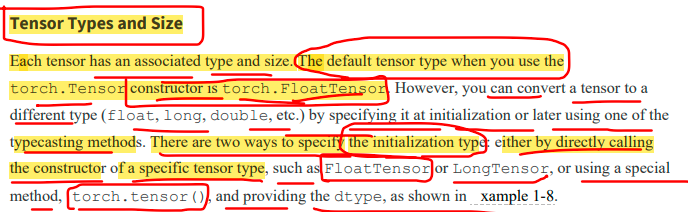

In [45]:
x = torch.FloatTensor([[1, 2, 3],[4, 5, 6]])

torch.LongTensor([[1, 2, 3],[4, 5, 6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

In [46]:
x = x.long()
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [47]:
x = torch.tensor([[1, 2, 3],[4, 5, 6]], dtype=torch.int64)
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [48]:
import torch
x = torch.arange(6)
x = x.view(2, 3)
x

tensor([[0, 1, 2],
        [3, 4, 5]])

In [51]:
torch.sum(x, dim=1)

tensor([ 3, 12])

In [53]:
indices = torch.LongTensor([0, 2])
torch.index_select(x, dim=1, index=indices)

tensor([[0, 2],
        [3, 5]])

In [57]:
torch.cat([x, x], dim=1)

tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])

In [60]:
torch.stack([x, x])

tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])

In [61]:
import torch
x = torch.ones(2, 2, requires_grad=True)

print(x.grad is None)


True


In [65]:
y = (x + 2) * (x + 5) + 3

print(x.grad is None)

False


In [66]:
z = y.mean()
z.backward()
print(x.grad is None,x.grad)

False tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [67]:
torch.cuda.is_available()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

False

In [80]:
# Create a 2D tensor and then add a dimension of size 1 inserted at dimension 0.
a = torch.rand(3, 3)
a,a.unsqueeze(0)

(tensor([[0.8571, 0.1272, 0.5671],
         [0.8678, 0.1349, 0.5609],
         [0.5399, 0.9611, 0.8596]]),
 tensor([[[0.8571, 0.1272, 0.5671],
          [0.8678, 0.1349, 0.5609],
          [0.5399, 0.9611, 0.8596]]]))

In [79]:
# Remove the extra dimension you just added to the previous tensor
a.squeeze(0)

tensor([[0.6265, 0.0944, 0.8423],
        [0.8002, 0.0979, 0.5183],
        [0.2106, 0.9965, 0.8122]])

In [78]:
# Create a random tensor of shape 5x3 in the interval [3, 7)
# torch.rand -> (0,1] * 4 -> (0,4] -> +3 -> (3,7]
3 + torch.rand(5, 3) * (7 - 3)


tensor([[4.4356, 4.7052, 3.9486],
        [5.7058, 3.8544, 3.8506],
        [5.6094, 5.6077, 3.4106],
        [5.9020, 5.6759, 6.3057],
        [4.1637, 6.7208, 6.2543]])

In [84]:
# Retrieve the indexes of all the nonzero elements in the tensor torch.Tensor([1, 1, 1,0, 1]).
x = torch.Tensor([1, 1, 1,0, 1])
torch.nonzero(x).squeeze()

tensor([0, 1, 2, 4])

In [102]:
# Create a random tensor of size (3,1) and then horizontally stack four copies together.
x = torch.rand(3,1)
x.expand(3, 5)

tensor([[0.0519, 0.0519, 0.0519, 0.0519, 0.0519],
        [0.4565, 0.4565, 0.4565, 0.4565, 0.4565],
        [0.8813, 0.8813, 0.8813, 0.8813, 0.8813]])

In [107]:
# Return the batch matrix­matrix product of two three­dimensional matrices
torch.bmm(torch.rand(3,4,5),torch.rand(3,5,4))

tensor([[[0.4288, 1.0264, 1.5230, 0.7726],
         [0.2929, 0.5663, 1.0461, 0.2992],
         [0.9683, 1.7371, 2.0848, 1.0098],
         [0.4129, 0.5699, 0.8666, 0.2569]],

        [[1.0970, 0.9879, 1.5947, 1.0429],
         [1.3839, 1.1351, 1.5880, 0.8415],
         [1.2905, 0.9692, 1.6983, 1.1453],
         [1.5490, 1.3088, 2.0733, 1.3002]],

        [[1.6245, 1.1532, 2.0825, 1.4734],
         [2.3500, 1.5221, 2.4402, 1.9832],
         [1.7589, 1.3363, 1.8927, 1.7274],
         [1.9742, 1.1757, 2.2648, 1.6924]]])

In [129]:
# Return the batch matrix­matrix product of a 3D matrix and a 2D matrix
a = torch.rand(3, 4, 5)
b = torch.rand(5, 4)
torch.bmm(a, b.unsqueeze(0).expand(a.size(0), *b.size()))


tensor([[[1.3594, 1.6847, 1.3222, 1.1079],
         [1.3856, 1.3774, 1.0104, 0.9778],
         [1.6522, 1.7354, 1.3114, 1.0709],
         [1.0632, 1.4406, 0.9751, 1.0406]],

        [[1.8630, 1.6769, 1.4773, 0.8620],
         [1.1673, 1.0197, 1.0312, 0.6003],
         [0.8092, 0.8085, 0.7755, 0.3829],
         [1.2714, 1.8079, 1.7807, 1.3623]],

        [[2.0304, 2.2254, 2.0003, 1.3739],
         [1.6003, 1.6340, 1.3617, 1.4053],
         [1.4340, 1.4910, 1.1912, 1.2815],
         [1.5161, 1.2032, 1.5207, 0.7030]]])

C:\Users\SIVERMA\AppData\Local\Temp\ipykernel_12756\604762606.py:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(- 5.,  5., 0.1)


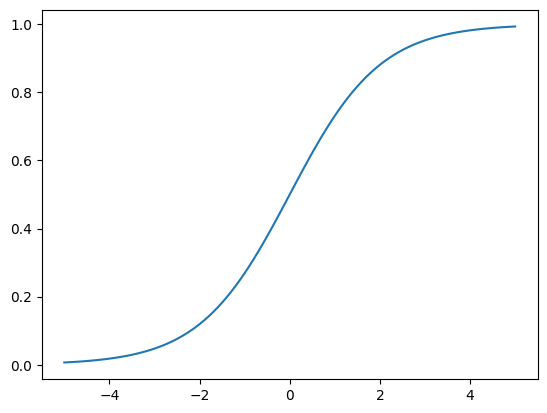

In [133]:
import torch
import matplotlib.pyplot as plt
x = torch.range(- 5.,  5., 0.1)
y = torch.sigmoid(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

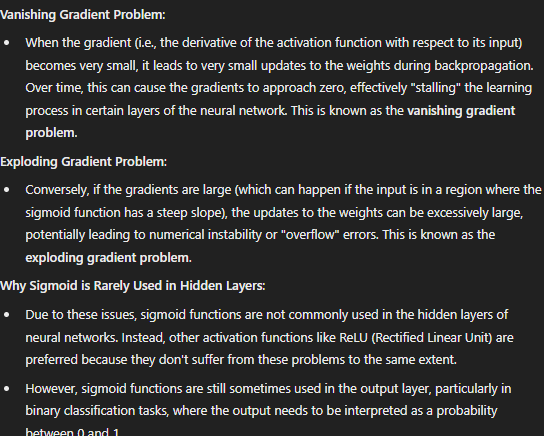

In [150]:
import torch
import torch.nn as nn

# Define a simple neural network with multiple layers
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(SimpleNN, self).__init__()
        self.num_layers = num_layers
        self.layers = nn.ModuleList([nn.Linear(input_size, hidden_size)])
        self.layers.extend([nn.Linear(hidden_size, hidden_size) for _ in range(num_layers - 1)])
        self.activation = nn.Sigmoid()

    def forward(self, x):
        for layer in self.layers:
            x = self.activation(layer(x))
        return x

# Function to demonstrate vanishing/exploding gradients
def demonstrate_gradients(initial_weight_scale, input_size=2, hidden_size=10, num_layers=10):
    # Initialize the network
    model = SimpleNN(input_size, hidden_size, num_layers)
    
    # Initialize the weights with the specified scale
    for layer in model.layers:
        nn.init.normal_(layer.weight, mean=0.0, std=initial_weight_scale)
        nn.init.zeros_(layer.bias)

    # Define a simple loss function and an input
    criterion = nn.MSELoss()
    input = torch.randn(1, input_size)
    target = torch.ones(1, hidden_size)  # Dummy target

    # Forward pass
    output = model(input)
    loss = criterion(output, target)

    # Backward pass to compute gradients
    loss.backward()

    # Print the gradients of the first and last layers
    print(f"Gradients of the first layer: {model.layers[0].weight.grad.norm().item()}")
    print(f"Gradients of the last layer: {model.layers[-1].weight.grad.norm().item()}")

# Demonstrate Vanishing Gradients
print("Vanishing Gradient Example:")
demonstrate_gradients(initial_weight_scale=0.01)  # Small weights -> vanishing gradients

# Demonstrate Exploding Gradients
print("\nExploding Gradient Example:")
demonstrate_gradients(initial_weight_scale=1.0)  # Large weights -> exploding gradients


Vanishing Gradient Example:
Gradients of the first layer: 8.408228726496871e-21
Gradients of the last layer: 0.12475551664829254

Exploding Gradient Example:
Gradients of the first layer: 8.102957508526742e-05
Gradients of the last layer: 0.10144434869289398


C:\Users\SIVERMA\AppData\Local\Temp\ipykernel_12756\3839167629.py:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5.0, 5., 0.1)


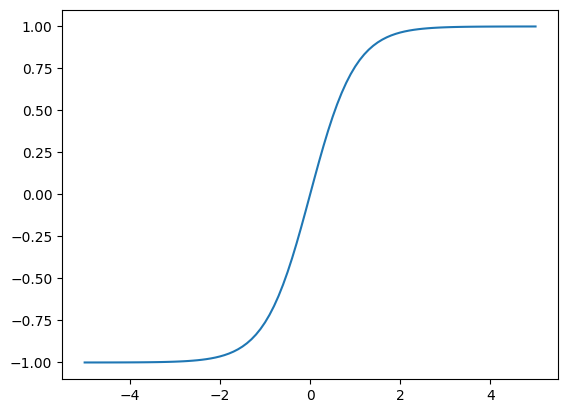

In [153]:
import torch
import matplotlib.pyplot as plt
x = torch.range(-5.0, 5., 0.1)
y = torch.tanh(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

C:\Users\SIVERMA\AppData\Local\Temp\ipykernel_12756\1636955879.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


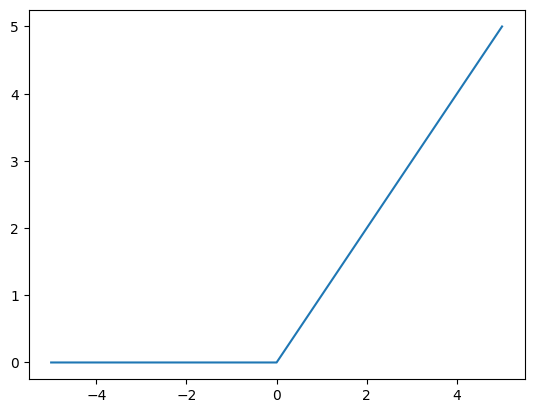

In [154]:
import torch
import matplotlib.pyplot as plt
relu = torch.nn.ReLU()
x = torch.range(-5., 5., 0.1)
y = relu(x)
plt.plot(x.numpy(), y.numpy())
plt.show()

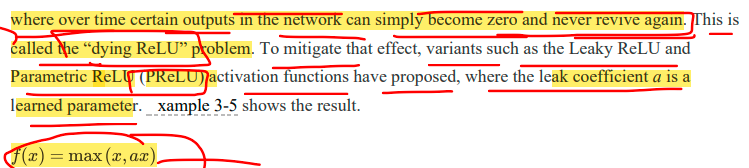
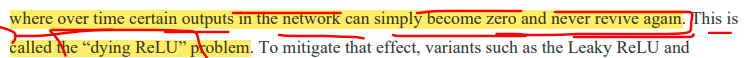

C:\Users\SIVERMA\AppData\Local\Temp\ipykernel_12756\3719050688.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5., 0.1)


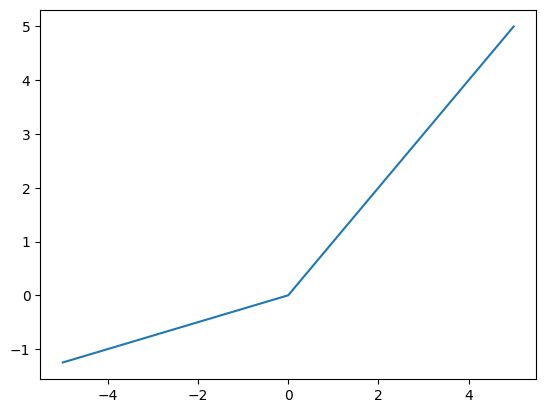

In [156]:
import torch
import matplotlib.pyplot as plt
prelu = torch.nn.PReLU(num_parameters=1)
x = torch.range(-5., 5., 0.1)
y = prelu(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.show()

In [157]:
import torch.nn as nn
import torch
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[ 0.0592, -0.0057, -0.7566]])
tensor([[0.4203, 0.3939, 0.1859]])
tensor([1.])


In [158]:
import torch
import torch.nn as nn
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)
loss = ce_loss(outputs, targets)
print(loss)

tensor(2.2042, grad_fn=<NllLossBackward0>)


# Hyperparameter:
A hyperparameter is any model setting that affects the number of parameters in the model and values taken by the parameters.
# regularization
This smoothness constraint in
machine learning is called L2 regularization

In [ ]:
from torch.utils.data import Dataset
class ReviewDataset(Dataset):
    def __init__(self, review_df, vectorizer):
        """
        Args:
        review_df (pandas.DataFrame): the dataset
        vectorizer (ReviewVectorizer): vectorizer instantiated from dataset
        """
        self.review_df = review_df
        self._vectorizer = vectorizer
        self.train_df = self.review_df[self.review_df.split=='train']
        self.train_size = len(self.train_df)
        self.val_df = self.review_df[self.review_df.split=='val']
        self.validation_size = len(self.val_df)
        self.test_df = self.review_df[self.review_df.split=='test']
        self.test_size = len(self.test_df)
        self._lookup_dict = {'train': (self.train_df, self.train_size),
        'val': (self.val_df, self.validation_size),
        'test': (self.test_df, self.test_size)}
        self.set_split('train')

    @classmethod
    def load_dataset_and_make_vectorizer(cls, review_csv):
        """Load dataset and make a new vectorizer from scratch
        Args:
        review_csv (str): location of the dataset
        Returns:
        an instance of ReviewDataset
        """
        review_df = pd.read_csv(review_csv)
        return cls(review_df, ReviewVectorizer.from_dataframe(review_df))
    
    def get_vectorizer(self):
        """ returns the vectorizer """
        return self._vectorizer
    
    def set_split(self, split="train"):
        """ selects the splits in the dataset using a column in the dataframe
        Args:
        split (str): one of "train", "val", or "test"
        """
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]
    
    def __len__(self):
        return self._target_size

    def __getitem__(self, index):
        """the primary entry point method for PyTorch datasets
        Args:
        index (int): the index to the data point
        Returns:
        a dict of the data point's features (x_data) and label (y_target)
        """
        row = self._target_df.iloc[index]
        review_vector = \
        self._vectorizer.vectorize(row.review)
        rating_index = \
        self._vectorizer.rating_vocab.lookup_token(row.rating)
        return {'x_data': review_vector,
                'y_target': rating_index}

    def get_num_batches(self, batch_size):
        """Given a batch size, return the number of batches in the dataset
        Args:
        batch_size (int)
        Returns:
        number of batches in the dataset
        """
        return len(self) // batch_size

# VOCABULARY

In [162]:
class Vocabulary(object):
    """Class to process text and extract vocabulary for mapping"""

    def __init__(self, token_to_idx=None, add_unk=True, unk_token="<UNK>"):
        """
        Args:
            token_to_idx (dict): a pre-existing map of tokens to indices
            add_unk (bool): a flag that indicates whether to add the UNK token
            unk_token (str): the UNK token to add into the Vocabulary
        """

        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx

        self._idx_to_token = {idx: token 
                              for token, idx in self._token_to_idx.items()}
        
        self._add_unk = add_unk
        self._unk_token = unk_token
        
        self.unk_index = -1
        if add_unk:
            self.unk_index = self.add_token(unk_token) 
        
        
    def to_serializable(self):
        """ returns a dictionary that can be serialized """
        return {'token_to_idx': self._token_to_idx, 
                'add_unk': self._add_unk, 
                'unk_token': self._unk_token}

    @classmethod
    def from_serializable(cls, contents):
        """ instantiates the Vocabulary from a serialized dictionary """
        return cls(**contents)

    def add_token(self, token):
        """Update mapping dicts based on the token.

        Args:
            token (str): the item to add into the Vocabulary
        Returns:
            index (int): the integer corresponding to the token
        """
        if token in self._token_to_idx:
            index = self._token_to_idx[token]
        else:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index
    
    def add_many(self, tokens):
        """Add a list of tokens into the Vocabulary
        
        Args:
            tokens (list): a list of string tokens
        Returns:
            indices (list): a list of indices corresponding to the tokens
        """
        return [self.add_token(token) for token in tokens]

    def lookup_token(self, token):
        """Retrieve the index associated with the token 
          or the UNK index if token isn't present.
        
        Args:
            token (str): the token to look up 
        Returns:
            index (int): the index corresponding to the token
        Notes:
            `unk_index` needs to be >=0 (having been added into the Vocabulary) 
              for the UNK functionality 
        """
        if self.unk_index >= 0:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]

    def lookup_index(self, index):
        """Return the token associated with the index
        
        Args: 
            index (int): the index to look up
        Returns:
            token (str): the token corresponding to the index
        Raises:
            KeyError: if the index is not in the Vocabulary
        """
        if index not in self._idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index)
        return self._idx_to_token[index]

    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)

    def __len__(self):
        return len(self._token_to_idx)

# Vectorizer

In [163]:
import string
from collections import Counter
class ReviewVectorizer(object):
    """ The Vectorizer which coordinates the Vocabularies and puts them to use"""
    def __init__(self, review_vocab, rating_vocab):
        """
        Args:
            review_vocab (Vocabulary): maps words to integers
            rating_vocab (Vocabulary): maps class labels to integers
        """
        self.review_vocab = review_vocab
        self.rating_vocab = rating_vocab

    def vectorize(self, review):
        """Create a collapsed one-hot vector for the review
        
        Args:
            review (str): the review 
        Returns:
            one_hot (np.ndarray): the collapsed one-hot encoding 
        """
        one_hot = np.zeros(len(self.review_vocab), dtype=np.float32)
        
        for token in review.split(" "):
            if token not in string.punctuation:
                one_hot[self.review_vocab.lookup_token(token)] = 1

        return one_hot

    @classmethod
    def from_dataframe(cls, review_df, cutoff=25):
        """Instantiate the vectorizer from the dataset dataframe
        
        Args:
            review_df (pandas.DataFrame): the review dataset
            cutoff (int): the parameter for frequency-based filtering
        Returns:
            an instance of the ReviewVectorizer
        """
        review_vocab = Vocabulary(add_unk=True)
        rating_vocab = Vocabulary(add_unk=False)
        
        # Add ratings
        for rating in sorted(set(review_df.rating)):
            rating_vocab.add_token(rating)

        # Add top words if count > provided count
        word_counts = Counter()
        for review in review_df.review:
            for word in review.split(" "):
                if word not in string.punctuation:
                    word_counts[word] += 1
               
        for word, count in word_counts.items():
            if count > cutoff:
                review_vocab.add_token(word)

        return cls(review_vocab, rating_vocab)

    @classmethod
    def from_serializable(cls, contents):
        """Instantiate a ReviewVectorizer from a serializable dictionary
        
        Args:
            contents (dict): the serializable dictionary
        Returns:
            an instance of the ReviewVectorizer class
        """
        review_vocab = Vocabulary.from_serializable(contents['review_vocab'])
        rating_vocab =  Vocabulary.from_serializable(contents['rating_vocab'])

        return cls(review_vocab=review_vocab, rating_vocab=rating_vocab)

    def to_serializable(self):
        """Create the serializable dictionary for caching
        
        Returns:
            contents (dict): the serializable dictionary
        """
        return {'review_vocab': self.review_vocab.to_serializable(),
                'rating_vocab': self.rating_vocab.to_serializable()}

In [164]:
from torch.utils.data import DataLoader
def generate_batches(dataset, batch_size, shuffle=True,
    drop_last=True, device="cpu"):
    """
    A generator function which wraps the PyTorch DataLoader. It will
    ensure each tensor is on the write device location.
    """
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size,
    shuffle=shuffle, drop_last=drop_last)
    for data_dict in dataloader:
        out_data_dict = {}
        for name, tensor in data_dict.items():
            out_data_dict[name] = data_dict[name].to(device)
        yield out_data_dict

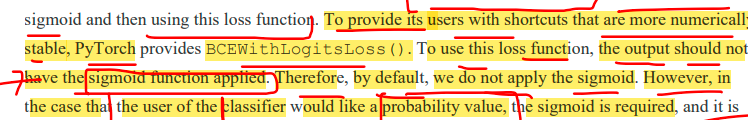

In [165]:
import torch.nn as nn
import torch.nn.functional as F
class ReviewClassifier(nn.Module):
    """ a simple perceptron­based classifier """
    def __init__(self, num_features):
        """
        Args:
        num_features (int): the size of the input feature vector
        """
        super(ReviewClassifier, self).__init__()
        self.fc1 = nn.Linear(in_features=num_features,out_features=1)
    def forward(self, x_in, apply_sigmoid=False):
        """The forward pass of the classifier
        Args:
        x_in (torch.Tensor): an input data tensor
        x_in.shape should be (batch, num_features)
        apply_sigmoid (bool): a flag for the sigmoid activation
        should be false if used with the cross­entropy losses
        Returns:
        the resulting tensor. tensor.shape should be (batch,).
        """
        y_out = self.fc1(x_in).squeeze()
        if apply_sigmoid:
            y_out = F.sigmoid(y_out)
        return y_out

In [ ]:
from argparse import Namespace
args = Namespace(
    # Data and path information
    frequency_cutoff=25,
    model_state_file='model.pth',
    review_csv='data/yelp/reviews_with_splits_lite.csv',
    save_dir='model_storage/ch3/yelp/',
    vectorizer_file='vectorizer.json',
    batch_size=128,
    early_stopping_criteria=5,
    learning_rate=0.001,
    num_epochs=100,
    seed=1337,
)


In [ ]:
import torch.optim as optim
def make_train_state(args):
    return {'epoch_index': 0,
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': [],
    'test_loss': -1,
    'test_acc': -1
    }
train_state = make_train_state(args)
if not torch.cuda.is_available():
    args.cuda = False
args.device = torch.device("cuda" if args.cuda else "cpu")
# dataset and vectorizer
dataset = ReviewDataset.load_dataset_and_make_vectorizer(args.review_csv)
vectorizer = dataset.get_vectorizer()
# model
classifier = ReviewClassifier(num_features=len(vectorizer.review_vocab))
classifier = classifier.to(args.device)





# loss and optimizer
loss_func = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(classifier.parameters(), lr=args.learning_rate)

In [166]:
def compute_accuracy(y_pred, y_target):
    y_target = y_target.cpu()
    y_pred_indices = (torch.sigmoid(y_pred)>0.5).cpu().long()#.max(dim=1)[1]
    n_correct = torch.eq(y_pred_indices, y_target).sum().item()
    return n_correct / len(y_pred_indices) * 100

In [ ]:
for epoch_index in range(args.num_epochs):
    train_state['epoch_index'] = epoch_index
    # Iterate over training dataset
    # setup: batch generator, set loss and acc to 0, set train mode on
    dataset.set_split('train')
    batch_generator = generate_batches(dataset,
    batch_size=args.batch_size,
    device=args.device)
    running_loss = 0.0
    running_acc = 0.0
    classifier.train()
    for batch_index, batch_dict in enumerate(batch_generator):
        # the training routine is 5 steps:
        # step 1. zero the gradients
        optimizer.zero_grad()
        # step 2. compute the output
        y_pred = classifier(x_in=batch_dict['x_data'].float())
        # step 3. compute the loss
        loss = loss_func(y_pred, batch_dict['y_target'].float())
        loss_batch = loss.item()
        running_loss += (loss_batch ­ running_loss) / (batch_index + 1)
        # step 4. use loss to produce gradients
        loss.backward()
        # step 5. use optimizer to take gradient step
        optimizer.step()
        # ­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­­
        # compute the accuracy
        acc_batch = compute_accuracy(y_pred, batch_dict['y_target'])
        running_acc += (acc_batch ­ running_acc) / (batch_index + 1)
    
    train_state['train_loss'].append(running_loss)
    train_state['train_acc'].append(running_acc)
    # Iterate over val dataset
    # setup: batch generator, set loss and acc to 0, set eval mode on
    dataset.set_split('val')
    batch_generator = generate_batches(dataset,
    batch_size=args.batch_size,
    device=args.device)
    running_loss = 0.
    running_acc = 0.
    classifier.eval()
    for batch_index, batch_dict in enumerate(batch_generator):
        # step 1. compute the output
        y_pred = classifier(x_in=batch_dict['x_data'].float())
        # step 2. compute the loss
        loss = loss_func(y_pred, batch_dict['y_target'].float())
        loss_batch = loss.item()
        running_loss += (loss_batch - running_loss) / (batch_index + 1)
        # step 3. compute the accuracy
        acc_batch = compute_accuracy(y_pred, batch_dict['y_target'])
    running_acc += (acc_batch - running_acc) / (batch_index + 1)
    train_state['val_loss'].append(running_loss)
    train_state['val_acc'].append(running_acc)


In [ ]:
import os
args = Namespace(
    # Data and Path information
    frequency_cutoff=25,
    model_state_file='model.pth',
    review_csv='data/yelp/reviews_with_splits_lite.csv',
    # review_csv='data/yelp/reviews_with_splits_full.csv',
    save_dir='model_storage/ch3/yelp/',
    vectorizer_file='vectorizer.json',
    # No Model hyper parameters
    # Training hyper parameters
    batch_size=128,
    early_stopping_criteria=5,
    learning_rate=0.001,
    num_epochs=100,
    seed=1337,
    # Runtime options
    catch_keyboard_interrupt=True,
    cuda=True,
    expand_filepaths_to_save_dir=True,
    reload_from_files=False,
)

if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir,
                                         args.model_state_file)
    
    print("Expanded filepaths: ")
    print("\t{}".format(args.vectorizer_file))
    print("\t{}".format(args.model_state_file))
    
# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False

print("Using CUDA: {}".format(args.cuda))

args.device = torch.device("cuda" if args.cuda else "cpu")

# # Set seed for reproducibility
# set_seed_everywhere(args.seed, args.cuda)

# # handle dirs
# handle_dirs(args.save_dir)

In [179]:
batch_size = 2
one_hot_size = 10
sequence_width = 7
data = torch.randn(batch_size, one_hot_size, sequence_width)
conv1 = torch.nn.Conv1d(in_channels=one_hot_size, out_channels=16,kernel_size=3)
intermediate1 = conv1(data)
print(data.size())
print(intermediate1.size())


torch.Size([2, 10, 7])
torch.Size([2, 16, 5])


C:\Users\SIVERMA\AppData\Local\Temp\ipykernel_12756\2960914996.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-1., 1., 0.9)


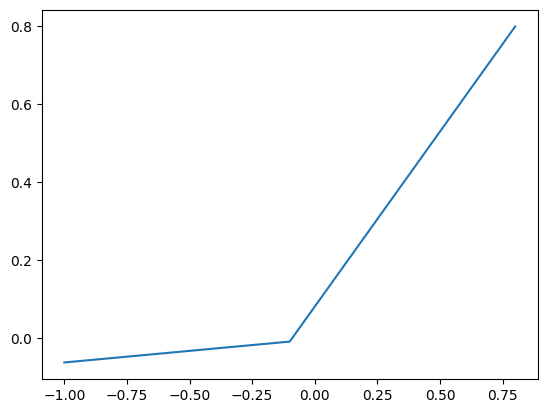

In [197]:
import torch
import matplotlib.pyplot as plt
prelu = torch.nn.ELU(alpha = .1)
x = torch.range(-1., 1., 0.9)
y = prelu(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.show()

C:\Users\SIVERMA\AppData\Local\Temp\ipykernel_12756\2452710392.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x = torch.range(-5., 5.,.5)


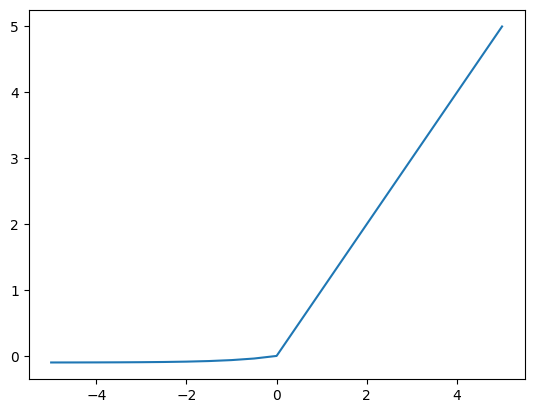

In [232]:
import torch
import matplotlib.pyplot as plt
prelu = torch.nn.ELU(alpha = .1)
x = torch.range(-5., 5.,.5)
y = prelu(x)
plt.plot(x.numpy(), y.detach().numpy())
plt.show()

In [262]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Sample data
texts = [
    "I love machine learning",
    "Deep learning is amazing",
    "I hate spam emails",
    "Spam emails are annoying",
    "Machine learning is the future",
    "Deep learning is a subset of machine learning"
]

labels = ["positive", "positive", "negative", "negative", "positive", "positive"]

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Vocabulary and word indexing
vocab = set(" ".join(texts).split())
word_to_idx = {word: i+1 for i, word in enumerate(vocab)}  # +1 to leave 0 for padding

# Convert texts to sequences of indices
max_len = max(len(text.split()) for text in texts)
X = np.zeros((len(texts), max_len), dtype=int)
for i, text in enumerate(texts):
    for j, word in enumerate(text.split()):
        X[i, j] = word_to_idx[word]

y = np.array(labels)


In [263]:
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        return torch.tensor(self.texts[idx], dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)


In [309]:
class TextCNN(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_classes, num_filters, kernel_sizes):
        super(TextCNN, self).__init__()
        
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        
        self.convs = nn.ModuleList([
            nn.Conv2d(1, num_filters, (k, embed_dim)) for k in kernel_sizes
        ])
        
        self.fc = nn.Linear(len(kernel_sizes) * num_filters, num_classes)
        self.conv1_bn = nn.BatchNorm1d(num_features=10)
        self.dropout = nn.Dropout(0.5)
    
    def forward(self, x):
        x = self.embedding(x)  # [batch_size, max_len, embed_dim]
        x = x.unsqueeze(1)  # Add channel dimension [batch_size, 1, max_len, embed_dim] => [2, 1, 8, 50]
        convs = [self.conv1_bn(F.relu(conv(x)).squeeze(3)) for conv in self.convs]  # List of [batch_size, num_filters, *]
        # torch.Size([2, 10, 6])
        # torch.Size([2, 10, 5])
        # torch.Size([2, 10, 4])
        pools = [F.max_pool1d(conv, conv.size(2)).squeeze(2) for conv in convs]  # List of [batch_size, num_filters]
        out = torch.cat(pools, 1)  # [batch_size, len(kernel_sizes) * num_filters]
        out = self.dropout(out)
        out = self.fc(out)
        
        return out

# Hyperparameters
vocab_size = len(vocab) + 1
embed_dim = 50
num_classes = len(set(labels))
num_filters = 10
kernel_sizes = [3, 4, 5]

# Model
model = TextCNN(vocab_size, embed_dim, num_classes, num_filters, kernel_sizes)

In [310]:
for texts, labels in test_loader:
    print(model(texts))
    break

tensor([[-1.1328, -2.3744],
        [-0.1604, -1.5132]], grad_fn=<AddmmBackward0>)


In [265]:
# Training parameters
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10

# Training loop
for epoch in range(epochs):
    model.train()
    for texts, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(texts)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 1/10, Loss: 0.9347
Epoch 2/10, Loss: 0.2879
Epoch 3/10, Loss: 0.6686
Epoch 4/10, Loss: 0.4712
Epoch 5/10, Loss: 0.3544
Epoch 6/10, Loss: 0.4593
Epoch 7/10, Loss: 0.3888
Epoch 8/10, Loss: 0.0837
Epoch 9/10, Loss: 0.1819
Epoch 10/10, Loss: 0.1072


In [266]:
# Evaluation
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for texts, labels in test_loader:
        outputs = model(texts)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 1.0000


# RNN for NER
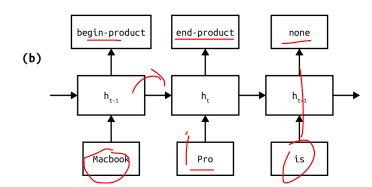

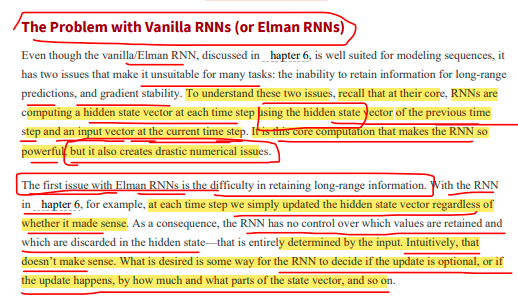

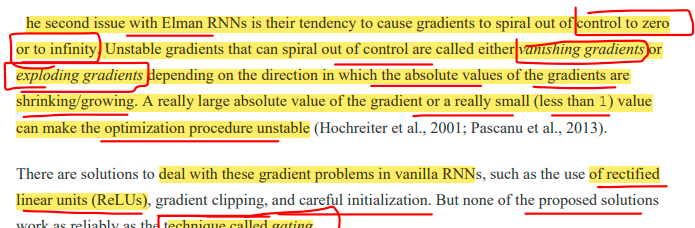

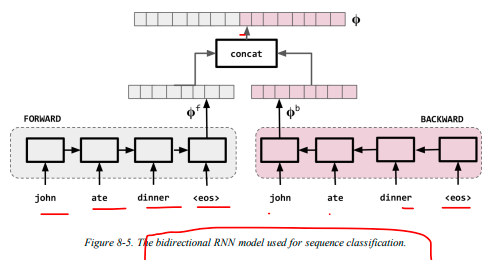

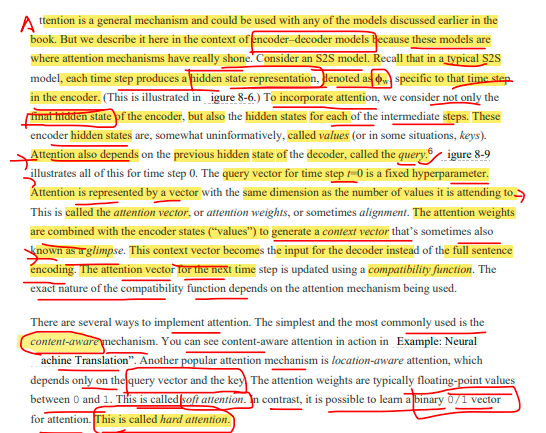


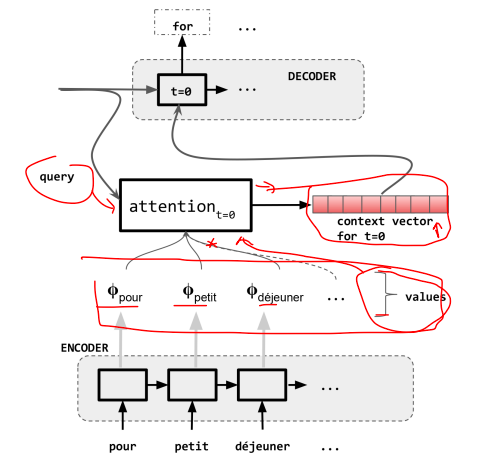


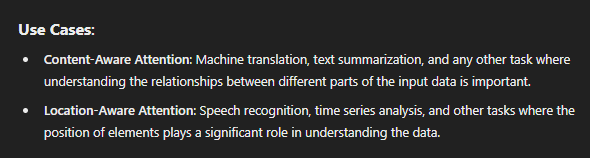

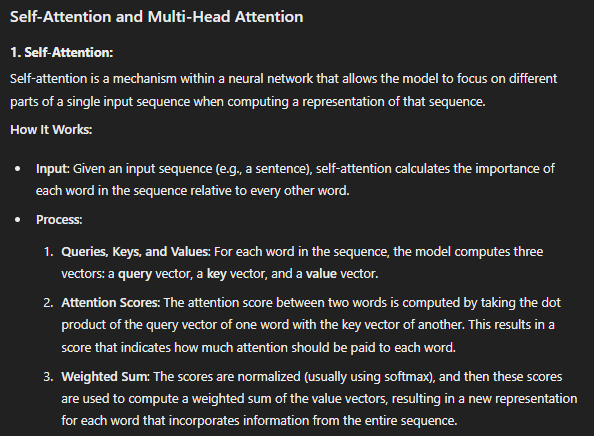

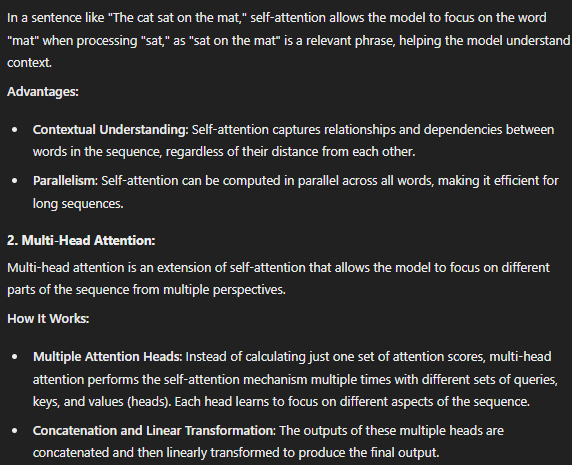

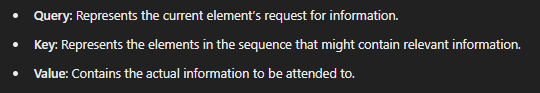

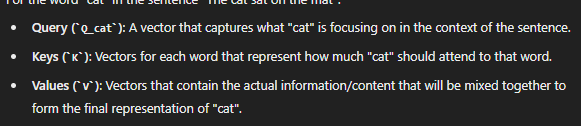

# _____________________________________________________________________________________________________

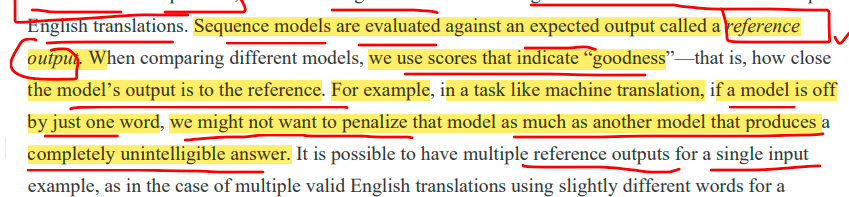

In [311]:
import os
from argparse import Namespace
from collections import Counter
import json
import re
import string

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm_notebook

In [313]:
class Vocabulary(object):
    """Class to process text and extract vocabulary for mapping"""

    def __init__(self, token_to_idx=None):
        """
        Args:
            token_to_idx (dict): a pre-existing map of tokens to indices
        """

        if token_to_idx is None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx

        self._idx_to_token = {idx: token 
                              for token, idx in self._token_to_idx.items()}
        
    def to_serializable(self):
        """ returns a dictionary that can be serialized """
        return {'token_to_idx': self._token_to_idx}

    @classmethod
    def from_serializable(cls, contents):
        """ instantiates the Vocabulary from a serialized dictionary """
        return cls(**contents)

    def add_token(self, token):
        """Update mapping dicts based on the token.

        Args:
            token (str): the item to add into the Vocabulary
        Returns:
            index (int): the integer corresponding to the token
        """
        if token in self._token_to_idx:
            index = self._token_to_idx[token]
        else:
            index = len(self._token_to_idx)
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index
            
    def add_many(self, tokens):
        """Add a list of tokens into the Vocabulary
        
        Args:
            tokens (list): a list of string tokens
        Returns:
            indices (list): a list of indices corresponding to the tokens
        """
        return [self.add_token(token) for token in tokens]

    def lookup_token(self, token):
        """Retrieve the index associated with the token 
        
        Args:
            token (str): the token to look up 
        Returns:
            index (int): the index corresponding to the token
        """
        return self._token_to_idx[token]

    def lookup_index(self, index):
        """Return the token associated with the index
        
        Args: 
            index (int): the index to look up
        Returns:
            token (str): the token corresponding to the index
        Raises:
            KeyError: if the index is not in the Vocabulary
        """
        if index not in self._idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index)
        return self._idx_to_token[index]

    def __str__(self):
        return "<Vocabulary(size=%d)>" % len(self)

    def __len__(self):
        return len(self._token_to_idx)
    

class SequenceVocabulary(Vocabulary):
    def __init__(self, token_to_idx=None, unk_token="<UNK>",
                 mask_token="<MASK>", begin_seq_token="<BEGIN>",
                 end_seq_token="<END>"):

        super(SequenceVocabulary, self).__init__(token_to_idx)

        self._mask_token = mask_token
        self._unk_token = unk_token
        self._begin_seq_token = begin_seq_token
        self._end_seq_token = end_seq_token

        self.mask_index = self.add_token(self._mask_token)
        self.unk_index = self.add_token(self._unk_token)
        self.begin_seq_index = self.add_token(self._begin_seq_token)
        self.end_seq_index = self.add_token(self._end_seq_token)

    def to_serializable(self):
        contents = super(SequenceVocabulary, self).to_serializable()
        contents.update({'unk_token': self._unk_token,
                         'mask_token': self._mask_token,
                         'begin_seq_token': self._begin_seq_token,
                         'end_seq_token': self._end_seq_token})
        return contents

    def lookup_token(self, token):
        """Retrieve the index associated with the token 
          or the UNK index if token isn't present.
        
        Args:
            token (str): the token to look up 
        Returns:
            index (int): the index corresponding to the token
        Notes:
            `unk_index` needs to be >=0 (having been added into the Vocabulary) 
              for the UNK functionality 
        """
        if self.unk_index >= 0:
            return self._token_to_idx.get(token, self.unk_index)
        else:
            return self._token_to_idx[token]

In [314]:
class NMTVectorizer(object):
    """ The Vectorizer which coordinates the Vocabularies and puts them to use"""        
    def __init__(self, source_vocab, target_vocab, max_source_length, max_target_length):
        """
        Args:
            source_vocab (SequenceVocabulary): maps source words to integers
            target_vocab (SequenceVocabulary): maps target words to integers
            max_source_length (int): the longest sequence in the source dataset
            max_target_length (int): the longest sequence in the target dataset
        """
        self.source_vocab = source_vocab
        self.target_vocab = target_vocab
        
        self.max_source_length = max_source_length
        self.max_target_length = max_target_length
        

    def _vectorize(self, indices, vector_length=-1, mask_index=0):
        """Vectorize the provided indices
        
        Args:
            indices (list): a list of integers that represent a sequence
            vector_length (int): an argument for forcing the length of index vector
            mask_index (int): the mask_index to use; almost always 0
        """
        if vector_length < 0:
            vector_length = len(indices)
        
        vector = np.zeros(vector_length, dtype=np.int64)
        vector[:len(indices)] = indices
        vector[len(indices):] = mask_index

        return vector
    
    def _get_source_indices(self, text):
        """Return the vectorized source text
        
        Args:
            text (str): the source text; tokens should be separated by spaces
        Returns:
            indices (list): list of integers representing the text
        """
        indices = [self.source_vocab.begin_seq_index]
        indices.extend(self.source_vocab.lookup_token(token) for token in text.split(" "))
        indices.append(self.source_vocab.end_seq_index)
        return indices
    
    def _get_target_indices(self, text):
        """Return the vectorized source text
        
        Args:
            text (str): the source text; tokens should be separated by spaces
        Returns:
            a tuple: (x_indices, y_indices)
                x_indices (list): list of integers representing the observations in target decoder 
                y_indices (list): list of integers representing predictions in target decoder
        """
        indices = [self.target_vocab.lookup_token(token) for token in text.split(" ")]
        x_indices = [self.target_vocab.begin_seq_index] + indices
        y_indices = indices + [self.target_vocab.end_seq_index]
        return x_indices, y_indices
        
    def vectorize(self, source_text, target_text, use_dataset_max_lengths=True):
        """Return the vectorized source and target text
        
        The vetorized source text is just the a single vector.
        The vectorized target text is split into two vectors in a similar style to 
            the surname modeling in Chapter 7.
        At each timestep, the first vector is the observation and the second vector is the target. 
        
        
        Args:
            source_text (str): text from the source language
            target_text (str): text from the target language
            use_dataset_max_lengths (bool): whether to use the global max vector lengths
        Returns:
            The vectorized data point as a dictionary with the keys: 
                source_vector, target_x_vector, target_y_vector, source_length
        """
        source_vector_length = -1
        target_vector_length = -1
        
        if use_dataset_max_lengths:
            source_vector_length = self.max_source_length + 2
            target_vector_length = self.max_target_length + 1
            
        source_indices = self._get_source_indices(source_text)
        source_vector = self._vectorize(source_indices, 
                                        vector_length=source_vector_length, 
                                        mask_index=self.source_vocab.mask_index)
        
        target_x_indices, target_y_indices = self._get_target_indices(target_text)
        target_x_vector = self._vectorize(target_x_indices,
                                        vector_length=target_vector_length,
                                        mask_index=self.target_vocab.mask_index)
        target_y_vector = self._vectorize(target_y_indices,
                                        vector_length=target_vector_length,
                                        mask_index=self.target_vocab.mask_index)
        return {"source_vector": source_vector, 
                "target_x_vector": target_x_vector, 
                "target_y_vector": target_y_vector, 
                "source_length": len(source_indices)}
        
    @classmethod
    def from_dataframe(cls, bitext_df):
        """Instantiate the vectorizer from the dataset dataframe
        
        Args:
            bitext_df (pandas.DataFrame): the parallel text dataset
        Returns:
            an instance of the NMTVectorizer
        """
        source_vocab = SequenceVocabulary()
        target_vocab = SequenceVocabulary()
        
        max_source_length = 0
        max_target_length = 0

        for _, row in bitext_df.iterrows():
            source_tokens = row["source_language"].split(" ")
            if len(source_tokens) > max_source_length:
                max_source_length = len(source_tokens)
            for token in source_tokens:
                source_vocab.add_token(token)
            
            target_tokens = row["target_language"].split(" ")
            if len(target_tokens) > max_target_length:
                max_target_length = len(target_tokens)
            for token in target_tokens:
                target_vocab.add_token(token)
            
        return cls(source_vocab, target_vocab, max_source_length, max_target_length)

    @classmethod
    def from_serializable(cls, contents):
        source_vocab = SequenceVocabulary.from_serializable(contents["source_vocab"])
        target_vocab = SequenceVocabulary.from_serializable(contents["target_vocab"])
        
        return cls(source_vocab=source_vocab, 
                   target_vocab=target_vocab, 
                   max_source_length=contents["max_source_length"], 
                   max_target_length=contents["max_target_length"])

    def to_serializable(self):
        return {"source_vocab": self.source_vocab.to_serializable(), 
                "target_vocab": self.target_vocab.to_serializable(), 
                "max_source_length": self.max_source_length,
                "max_target_length": self.max_target_length}

In [315]:
class NMTEncoder(nn.Module):
    def __init__(self, num_embeddings, embedding_size, rnn_hidden_size):
        """
        Args:
            num_embeddings (int): number of embeddings is the size of source vocabulary
            embedding_size (int): size of the embedding vectors
            rnn_hidden_size (int): size of the RNN hidden state vectors 
        """
        super(NMTEncoder, self).__init__()
    
        self.source_embedding = nn.Embedding(num_embeddings, embedding_size, padding_idx=0)
        self.birnn = nn.GRU(embedding_size, rnn_hidden_size, bidirectional=True, batch_first=True)
    
    def forward(self, x_source, x_lengths):
        """The forward pass of the model
        
        Args:
            x_source (torch.Tensor): the input data tensor.
                x_source.shape is (batch, seq_size)
            x_lengths (torch.Tensor): a vector of lengths for each item in the batch
        Returns:
            a tuple: x_unpacked (torch.Tensor), x_birnn_h (torch.Tensor)
                x_unpacked.shape = (batch, seq_size, rnn_hidden_size * 2)
                x_birnn_h.shape = (batch, rnn_hidden_size * 2)
        """
        x_embedded = self.source_embedding(x_source)
        # create PackedSequence; x_packed.data.shape=(number_items, embeddign_size)
        x_packed = pack_padded_sequence(x_embedded, x_lengths.detach().cpu().numpy(), 
                                        batch_first=True)
        
        # x_birnn_h.shape = (num_rnn, batch_size, feature_size)
        x_birnn_out, x_birnn_h  = self.birnn(x_packed)
        # permute to (batch_size, num_rnn, feature_size)
        x_birnn_h = x_birnn_h.permute(1, 0, 2)
        
        # flatten features; reshape to (batch_size, num_rnn * feature_size)
        #  (recall: -1 takes the remaining positions, 
        #           flattening the two RNN hidden vectors into 1)
        x_birnn_h = x_birnn_h.contiguous().view(x_birnn_h.size(0), -1)
        
        x_unpacked, _ = pad_packed_sequence(x_birnn_out, batch_first=True)
        
        return x_unpacked, x_birnn_h

def verbose_attention(encoder_state_vectors, query_vector):
    """A descriptive version of the neural attention mechanism 
    
    Args:
        encoder_state_vectors (torch.Tensor): 3dim tensor from bi-GRU in encoder
        query_vector (torch.Tensor): hidden state in decoder GRU
    Returns:
        
    """
    batch_size, num_vectors, vector_size = encoder_state_vectors.size()
    vector_scores = torch.sum(encoder_state_vectors * query_vector.view(batch_size, 1, vector_size), 
                              dim=2)
    vector_probabilities = F.softmax(vector_scores, dim=1)
    weighted_vectors = encoder_state_vectors * vector_probabilities.view(batch_size, num_vectors, 1)
    context_vectors = torch.sum(weighted_vectors, dim=1)
    return context_vectors, vector_probabilities, vector_scores

def terse_attention(encoder_state_vectors, query_vector):
    """A shorter and more optimized version of the neural attention mechanism
    
    Args:
        encoder_state_vectors (torch.Tensor): 3dim tensor from bi-GRU in encoder
        query_vector (torch.Tensor): hidden state
    """
    vector_scores = torch.matmul(encoder_state_vectors, query_vector.unsqueeze(dim=2)).squeeze()
    vector_probabilities = F.softmax(vector_scores, dim=-1)
    context_vectors = torch.matmul(encoder_state_vectors.transpose(-2, -1), 
                                   vector_probabilities.unsqueeze(dim=2)).squeeze()
    return context_vectors, vector_probabilities



class NMTDecoder(nn.Module):
    def __init__(self, num_embeddings, embedding_size, rnn_hidden_size, bos_index):
        """
        Args:
            num_embeddings (int): number of embeddings is also the number of 
                unique words in target vocabulary 
            embedding_size (int): the embedding vector size
            rnn_hidden_size (int): size of the hidden rnn state
            bos_index(int): begin-of-sequence index
        """
        super(NMTDecoder, self).__init__()
        self._rnn_hidden_size = rnn_hidden_size
        self.target_embedding = nn.Embedding(num_embeddings=num_embeddings, 
                                             embedding_dim=embedding_size, 
                                             padding_idx=0)
        self.gru_cell = nn.GRUCell(embedding_size + rnn_hidden_size, 
                                   rnn_hidden_size)
        self.hidden_map = nn.Linear(rnn_hidden_size, rnn_hidden_size)
        self.classifier = nn.Linear(rnn_hidden_size * 2, num_embeddings)
        self.bos_index = bos_index
        self._sampling_temperature = 3
    
    def _init_indices(self, batch_size):
        """ return the BEGIN-OF-SEQUENCE index vector """
        return torch.ones(batch_size, dtype=torch.int64) * self.bos_index
    
    def _init_context_vectors(self, batch_size):
        """ return a zeros vector for initializing the context """
        return torch.zeros(batch_size, self._rnn_hidden_size)
            
    def forward(self, encoder_state, initial_hidden_state, target_sequence, sample_probability=0.0):
        """The forward pass of the model
        
        Args:
            encoder_state (torch.Tensor): the output of the NMTEncoder
            initial_hidden_state (torch.Tensor): The last hidden state in the  NMTEncoder
            target_sequence (torch.Tensor): the target text data tensor
            sample_probability (float): the schedule sampling parameter
                probabilty of using model's predictions at each decoder step
        Returns:
            output_vectors (torch.Tensor): prediction vectors at each output step
        """
        if target_sequence is None:
            sample_probability = 1.0
        else:
            # We are making an assumption there: The batch is on first
            # The input is (Batch, Seq)
            # We want to iterate over sequence so we permute it to (S, B)
            target_sequence = target_sequence.permute(1, 0)
            output_sequence_size = target_sequence.size(0)
        
        # use the provided encoder hidden state as the initial hidden state
        h_t = self.hidden_map(initial_hidden_state)
        
        batch_size = encoder_state.size(0)
        # initialize context vectors to zeros
        context_vectors = self._init_context_vectors(batch_size)
        # initialize first y_t word as BOS
        y_t_index = self._init_indices(batch_size)
        
        h_t = h_t.to(encoder_state.device)
        y_t_index = y_t_index.to(encoder_state.device)
        context_vectors = context_vectors.to(encoder_state.device)

        output_vectors = []
        self._cached_p_attn = []
        self._cached_ht = []
        self._cached_decoder_state = encoder_state.cpu().detach().numpy()
        
        for i in range(output_sequence_size):
            # Schedule sampling is whe
            use_sample = np.random.random() < sample_probability
            if not use_sample:
                y_t_index = target_sequence[i]
                
            # Step 1: Embed word and concat with previous context
            y_input_vector = self.target_embedding(y_t_index)
            rnn_input = torch.cat([y_input_vector, context_vectors], dim=1)
            
            # Step 2: Make a GRU step, getting a new hidden vector
            h_t = self.gru_cell(rnn_input, h_t)
            self._cached_ht.append(h_t.cpu().detach().numpy())
            
            # Step 3: Use the current hidden to attend to the encoder state
            context_vectors, p_attn, _ = verbose_attention(encoder_state_vectors=encoder_state, 
                                                           query_vector=h_t)
            
            # auxillary: cache the attention probabilities for visualization
            self._cached_p_attn.append(p_attn.cpu().detach().numpy())
            
            # Step 4: Use the current hidden and context vectors to make a prediction to the next word
            prediction_vector = torch.cat((context_vectors, h_t), dim=1)
            score_for_y_t_index = self.classifier(F.dropout(prediction_vector, 0.3))
            
            if use_sample:
                p_y_t_index = F.softmax(score_for_y_t_index * self._sampling_temperature, dim=1)
                # _, y_t_index = torch.max(p_y_t_index, 1)
                y_t_index = torch.multinomial(p_y_t_index, 1).squeeze()
            
            # auxillary: collect the prediction scores
            output_vectors.append(score_for_y_t_index)
            
        output_vectors = torch.stack(output_vectors).permute(1, 0, 2)
        
        return output_vectors
    
    
class NMTModel(nn.Module):
    """ The Neural Machine Translation Model """
    def __init__(self, source_vocab_size, source_embedding_size, 
                 target_vocab_size, target_embedding_size, encoding_size, 
                 target_bos_index):
        """
        Args:
            source_vocab_size (int): number of unique words in source language
            source_embedding_size (int): size of the source embedding vectors
            target_vocab_size (int): number of unique words in target language
            target_embedding_size (int): size of the target embedding vectors
            encoding_size (int): the size of the encoder RNN.  
        """
        super(NMTModel, self).__init__()
        self.encoder = NMTEncoder(num_embeddings=source_vocab_size, 
                                  embedding_size=source_embedding_size,
                                  rnn_hidden_size=encoding_size)
        decoding_size = encoding_size * 2
        self.decoder = NMTDecoder(num_embeddings=target_vocab_size, 
                                  embedding_size=target_embedding_size, 
                                  rnn_hidden_size=decoding_size,
                                  bos_index=target_bos_index)
    
    def forward(self, x_source, x_source_lengths, target_sequence, sample_probability=0.0):
        """The forward pass of the model
        
        Args:
            x_source (torch.Tensor): the source text data tensor. 
                x_source.shape should be (batch, vectorizer.max_source_length)
            x_source_lengths torch.Tensor): the length of the sequences in x_source 
            target_sequence (torch.Tensor): the target text data tensor
            sample_probability (float): the schedule sampling parameter
                probabilty of using model's predictions at each decoder step
        Returns:
            decoded_states (torch.Tensor): prediction vectors at each output step
        """
        encoder_state, final_hidden_states = self.encoder(x_source, x_source_lengths)
        decoded_states = self.decoder(encoder_state=encoder_state, 
                                      initial_hidden_state=final_hidden_states, 
                                      target_sequence=target_sequence, 
                                      sample_probability=sample_probability)
        return decoded_states

In [316]:
def set_seed_everywhere(seed, cuda):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if cuda:
        torch.cuda.manual_seed_all(seed)

def handle_dirs(dirpath):
    if not os.path.exists(dirpath):
        os.makedirs(dirpath)

def make_train_state(args):
    return {'stop_early': False,
            'early_stopping_step': 0,
            'early_stopping_best_val': 1e8,
            'learning_rate': args.learning_rate,
            'epoch_index': 0,
            'train_loss': [],
            'train_acc': [],
            'val_loss': [],
            'val_acc': [],
            'test_loss': -1,
            'test_acc': -1,
            'model_filename': args.model_state_file}

def update_train_state(args, model, train_state):
    """Handle the training state updates.
    Components:
     - Early Stopping: Prevent overfitting.
     - Model Checkpoint: Model is saved if the model is better
    
    :param args: main arguments
    :param model: model to train
    :param train_state: a dictionary representing the training state values
    :returns:
        a new train_state
    """

    # Save one model at least
    if train_state['epoch_index'] == 0:
        torch.save(model.state_dict(), train_state['model_filename'])
        train_state['stop_early'] = False

    # Save model if performance improved
    elif train_state['epoch_index'] >= 1:
        loss_tm1, loss_t = train_state['val_loss'][-2:]
         
        # If loss worsened
        if loss_t >= loss_tm1:
            # Update step
            train_state['early_stopping_step'] += 1
        # Loss decreased
        else:
            # Save the best model
            if loss_t < train_state['early_stopping_best_val']:
                torch.save(model.state_dict(), train_state['model_filename'])
                train_state['early_stopping_best_val'] = loss_t

            # Reset early stopping step
            train_state['early_stopping_step'] = 0

        # Stop early ?
        train_state['stop_early'] = \
            train_state['early_stopping_step'] >= args.early_stopping_criteria

    return train_state

def normalize_sizes(y_pred, y_true):
    """Normalize tensor sizes
    
    Args:
        y_pred (torch.Tensor): the output of the model
            If a 3-dimensional tensor, reshapes to a matrix
        y_true (torch.Tensor): the target predictions
            If a matrix, reshapes to be a vector
    """
    if len(y_pred.size()) == 3:
        y_pred = y_pred.contiguous().view(-1, y_pred.size(2))
    if len(y_true.size()) == 2:
        y_true = y_true.contiguous().view(-1)
    return y_pred, y_true

def compute_accuracy(y_pred, y_true, mask_index):
    y_pred, y_true = normalize_sizes(y_pred, y_true)

    _, y_pred_indices = y_pred.max(dim=1)
    
    correct_indices = torch.eq(y_pred_indices, y_true).float()
    valid_indices = torch.ne(y_true, mask_index).float()
    
    n_correct = (correct_indices * valid_indices).sum().item()
    n_valid = valid_indices.sum().item()

    return n_correct / n_valid * 100

def sequence_loss(y_pred, y_true, mask_index):
    y_pred, y_true = normalize_sizes(y_pred, y_true)
    return F.cross_entropy(y_pred, y_true, ignore_index=mask_index)

In [317]:
args = Namespace(dataset_csv="data/nmt/simplest_eng_fra.csv",
                 vectorizer_file="vectorizer.json",
                 model_state_file="model.pth",
                 save_dir="model_storage/ch8/nmt_luong_sampling",
                 reload_from_files=False,
                 expand_filepaths_to_save_dir=True,
                 cuda=True,
                 seed=1337,
                 learning_rate=5e-4,
                 batch_size=32,
                 num_epochs=100,
                 early_stopping_criteria=5,              
                 source_embedding_size=24, 
                 target_embedding_size=24,
                 encoding_size=32,
                 catch_keyboard_interrupt=True)

if args.expand_filepaths_to_save_dir:
    args.vectorizer_file = os.path.join(args.save_dir,
                                        args.vectorizer_file)

    args.model_state_file = os.path.join(args.save_dir,
                                         args.model_state_file)
    
    print("Expanded filepaths: ")
    print("\t{}".format(args.vectorizer_file))
    print("\t{}".format(args.model_state_file))
    
# Check CUDA
if not torch.cuda.is_available():
    args.cuda = False

args.device = torch.device("cuda" if args.cuda else "cpu")
    
print("Using CUDA: {}".format(args.cuda))

# Set seed for reproducibility
set_seed_everywhere(args.seed, args.cuda)

# handle dirs
handle_dirs(args.save_dir)

Expanded filepaths: 
	model_storage/ch8/nmt_luong_sampling\vectorizer.json
	model_storage/ch8/nmt_luong_sampling\model.pth
Using CUDA: False


In [ ]:
if args.reload_from_files and os.path.exists(args.vectorizer_file):
    # training from a checkpoint
    dataset = NMTDataset.load_dataset_and_load_vectorizer(args.dataset_csv,
                                                          args.vectorizer_file)
else:
    # create dataset and vectorizer
    dataset = NMTDataset.load_dataset_and_make_vectorizer(args.dataset_csv)
    dataset.save_vectorizer(args.vectorizer_file)

vectorizer = dataset.get_vectorizer()

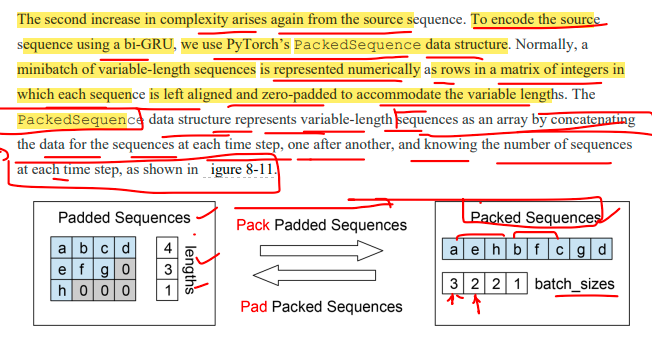

In [ ]:
def generate_nmt_batches(dataset, batch_size, shuffle=True,drop_last=True, device="cpu"):
    """A generator function which wraps the PyTorch DataLoader; NMT version """
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size,
    shuffle=shuffle, drop_last=drop_last)
    for data_dict in dataloader:
        lengths = data_dict['x_source_length'].numpy()
        sorted_length_indices = lengths.argsort()[::-1].tolist()
        out_data_dict = {}
        for name, tensor in data_dict.items():
            out_data_dict[name] = data_dict[name][sorted_length_indices].to(device)
        yield out_data_dict